In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Wed Nov 23 16:52:03 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [16]:
import tensorflow as tf
from keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import models
import PIL

In [4]:
IMAGE_SIZE = 180
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=10,
    shear_range=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/NEW_LEARNING/Deep_Learning/Potato_disease_classification/dataset/train',
    class_mode='sparse',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32
)

Found 1506 images belonging to 3 classes.


(32, 180, 180, 3)
<class 'numpy.ndarray'>


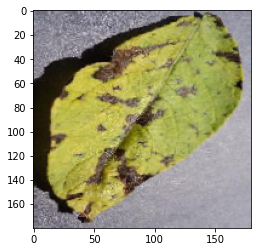

In [5]:
for images, labels in train_generator:
  print(images.shape)
  print(type(images[0]))
  plt.imshow(images[0])
  break

In [6]:
class_names = ['Early_blight', 'late_blight', 'healthy']

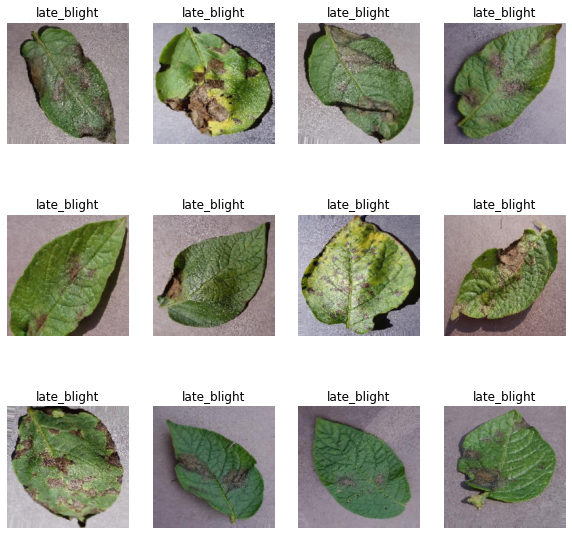

In [7]:
plt.figure(figsize=(10,10))
for images, labels in train_generator:
  for i in range(12):
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(images[i])
    plt.title(class_names[int(labels[0])])
    plt.axis("off")
  break
  
    

In [8]:
val_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=10,
    shear_range=0.2
)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/NEW_LEARNING/Deep_Learning/Potato_disease_classification/dataset/val',
    class_mode='sparse',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32
)

Found 215 images belonging to 3 classes.


In [9]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=10,
    shear_range=0.2
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/NEW_LEARNING/Deep_Learning/Potato_disease_classification/dataset/test',
    class_mode='sparse',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32
)

Found 431 images belonging to 3 classes.


In [21]:
input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

In [22]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 41, 41, 64)        36928     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 20, 20, 64)      

In [23]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [24]:
EPOCHS = 10
history = model.fit(
    train_generator,
    batch_size=32,
    epochs=EPOCHS,
    verbose=1,
    validation_data=val_generator
)

Epoch 1/10
48/48 [==============================] - 222s 4s/step - loss: 0.8921 - accuracy: 0.4987 - val_loss: 0.8026 - val_accuracy: 0.6837
Epoch 2/10
48/48 [==============================] - 16s 341ms/step - loss: 0.7093 - accuracy: 0.6846 - val_loss: 0.6179 - val_accuracy: 0.7395
Epoch 3/10
48/48 [==============================] - 15s 319ms/step - loss: 0.5059 - accuracy: 0.7829 - val_loss: 0.5686 - val_accuracy: 0.7349
Epoch 4/10
48/48 [==============================] - 15s 321ms/step - loss: 0.4192 - accuracy: 0.8360 - val_loss: 0.6147 - val_accuracy: 0.7163
Epoch 5/10
48/48 [==============================] - 15s 321ms/step - loss: 0.4128 - accuracy: 0.8274 - val_loss: 0.3473 - val_accuracy: 0.8651
Epoch 6/10
48/48 [==============================] - 16s 342ms/step - loss: 0.3570 - accuracy: 0.8572 - val_loss: 0.3567 - val_accuracy: 0.8465
Epoch 7/10
48/48 [==============================] - 15s 321ms/step - loss: 0.2798 - accuracy: 0.8845 - val_loss: 0.3284 - val_accuracy: 0.8930
E

In [29]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 48}

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

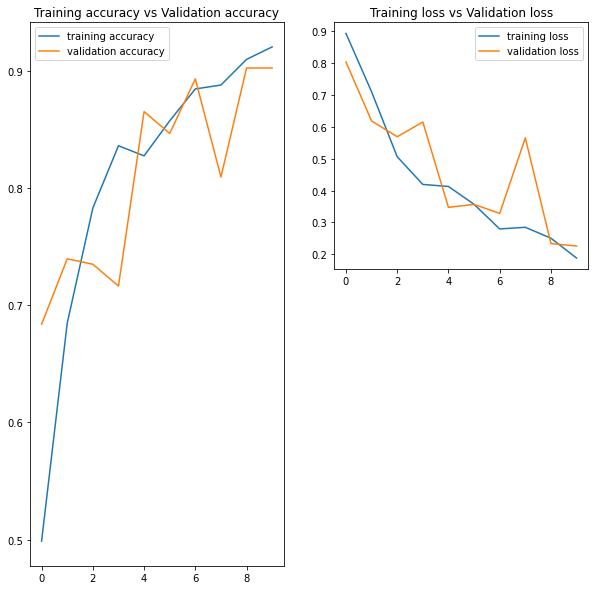

In [33]:
plt.figure(figsize=(10,10))

plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history.history['accuracy'], label='training accuracy')
plt.plot(range(EPOCHS), history.history['val_accuracy'], label='validation accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.legend()

plt.subplot(2,2,2)
plt.plot(range(EPOCHS), history.history['loss'], label='training loss')
plt.plot(range(EPOCHS), history.history['val_loss'], label='validation loss')
plt.title('Training loss vs Validation loss')
plt.legend()

In [34]:
model.evaluate(test_generator)

14/14 [==============================] - 89s 7s/step - loss: 0.2037 - accuracy: 0.9304


[0.20366576313972473, 0.9303944110870361]

In [36]:
model.save('/content/drive/MyDrive/NEW_LEARNING/Deep_Learning/Potato_disease_classification/potatos.h5')

In [39]:
model_version = 3
model.save(f'/content/drive/MyDrive/NEW_LEARNING/Deep_Learning/Potato_disease_classification/saved_model1/{model_version}')

In [40]:
predictions = model.predict(test_generator)

14/14 [==============================] - 5s 326ms/step


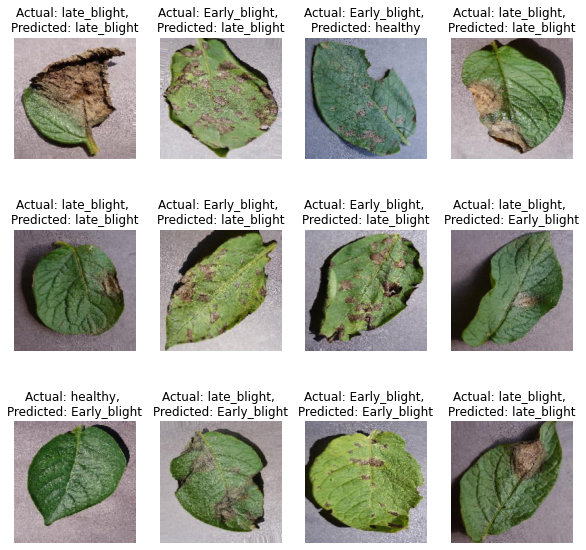

In [45]:
import numpy as np

plt.figure(figsize=(10, 10))
for images, labels in test_generator:
  for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i])
    plt.title(f"Actual: {class_names[int(labels[i])]}, \nPredicted: {class_names[np.argmax(predictions[i])]}")
    plt.axis("off") 
  break


In [46]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)

  return predicted_class, confidence

1/1 [==============================] - 0s 15ms/step


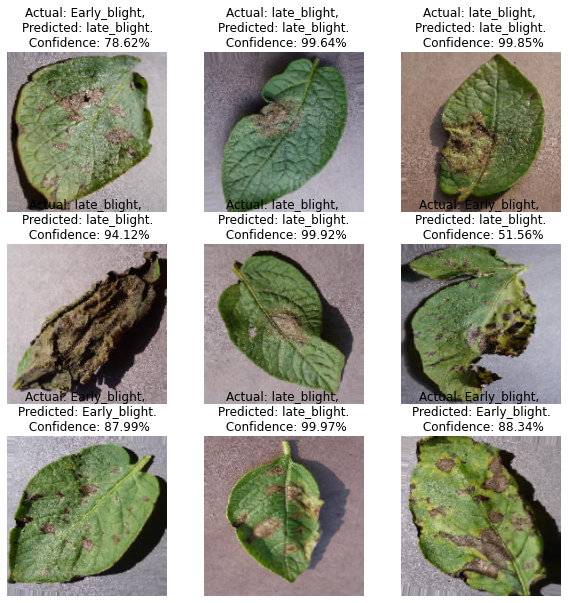

In [48]:
plt.figure(figsize=(10, 10))
for images, labels in test_generator:
  for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(images[i])

    predicted_class, confidence = predict(model, images[i])
    actual_class = class_names[int(labels[i])]

    plt.title(f"Actual: {actual_class}, \nPredicted: {predicted_class}.\n Confidence: {confidence}%")
    plt.axis("off")
  break